
# Code for data modelling report

### Loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Loading the dataset
df = pd.read_csv('A2_HR_Employee_Data.csv')

# Displaying the first few rows to understand what the data looks like
df.head()

,EmployeeID,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2824,41,Yes,Travel_Rarely,Sales,2,Female,4,Single,5993,...,11,3,63.0,8,0,1,6,4,0,5
1,1409,49,No,Travel_Frequently,Consultants,1,Male,2,Married,5130,...,23,4,40.0,10,3,3,10,7,1,7
2,5506,37,Yes,Travel_Rarely,Consultants,2,Male,3,Single,2090,...,15,3,50.0,7,3,3,0,0,0,0
3,5012,33,No,Travel_Frequently,Consultants,4,Female,3,Married,2909,...,11,3,48.0,8,3,3,8,7,3,0
4,4657,27,No,Travel_Rarely,Consultants,1,Male,2,Married,3468,...,12,3,40.0,6,3,3,2,2,2,2


### Features Overview

In [2]:
# Getting the number of unique values for each column
unique_values = df.nunique()

# Getting the data types for each column
data_types = df.dtypes

print(unique_values)
print(data_types)

EmployeeID                  1470
Age                           43
Resigned                       2
BusinessTravel                 3
BusinessUnit                   3
EducationLevel                 5
Gender                         2
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
AverageWeeklyHoursWorked      23
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInRole                   19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64
EmployeeID                    int64
Age                           int64
Resigned                     object
BusinessTravel               object
BusinessUnit                 object
EducationLevel                int64
Gender                       object
JobSatisf

### Descriptive Analysis

In [3]:
# Descriptive statistics for numerical columns

# Selecting numerical columns excluding 'EmployeeID'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('EmployeeID')

# Generating descriptive statistics for these columns
numerical_stats = df[numerical_columns].describe()

# Displaying the descriptive statistics
numerical_stats

,Age,EducationLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,2.728571,6502.931293,2.693197,15.209524,3.153741,43.042177,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,1.024165,1.102846,4707.956783,2.498009,3.659938,0.360824,5.389864,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,40.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,3.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,40.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,4.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,47.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,71.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


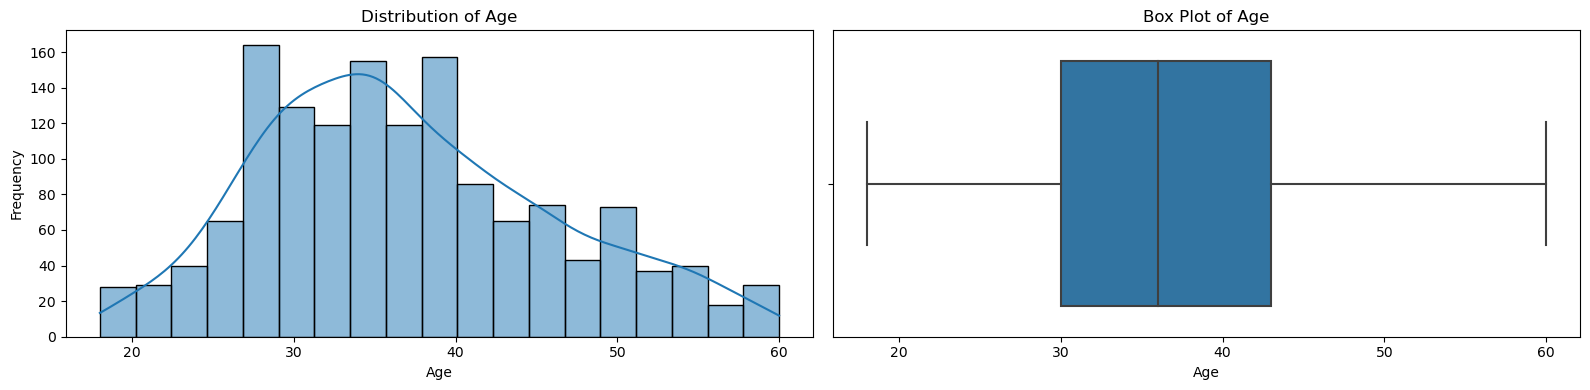

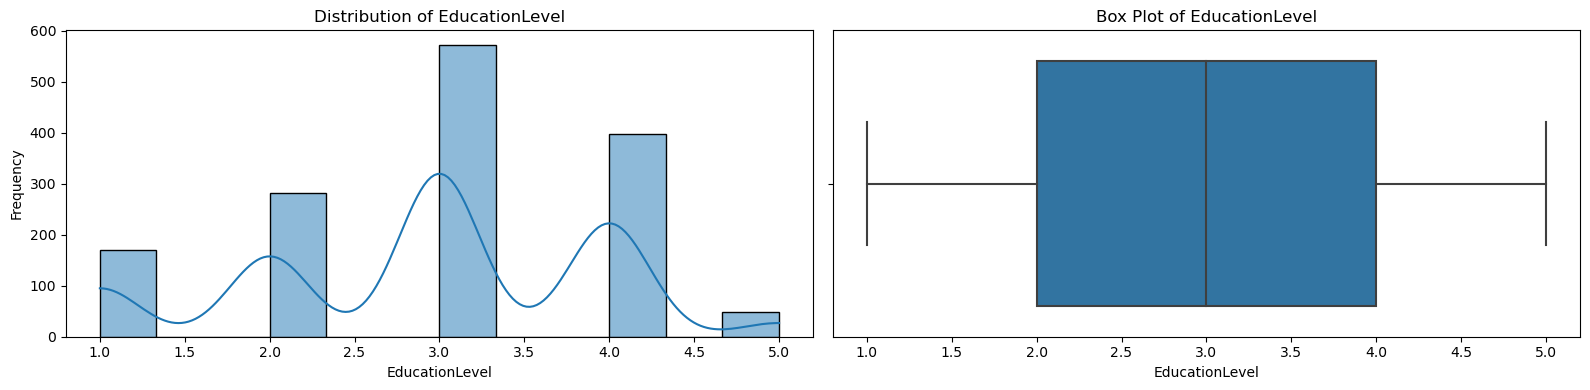

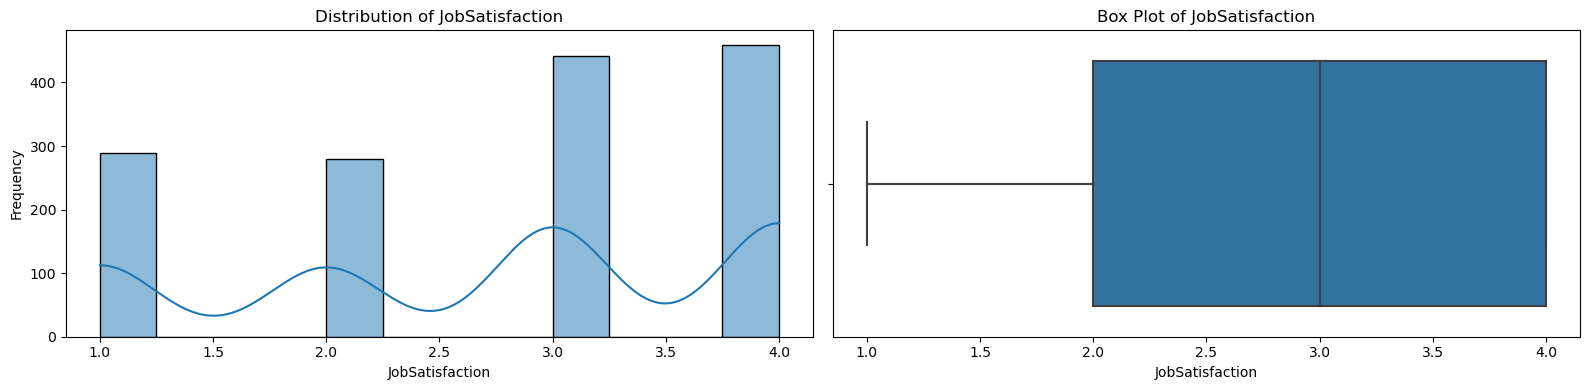

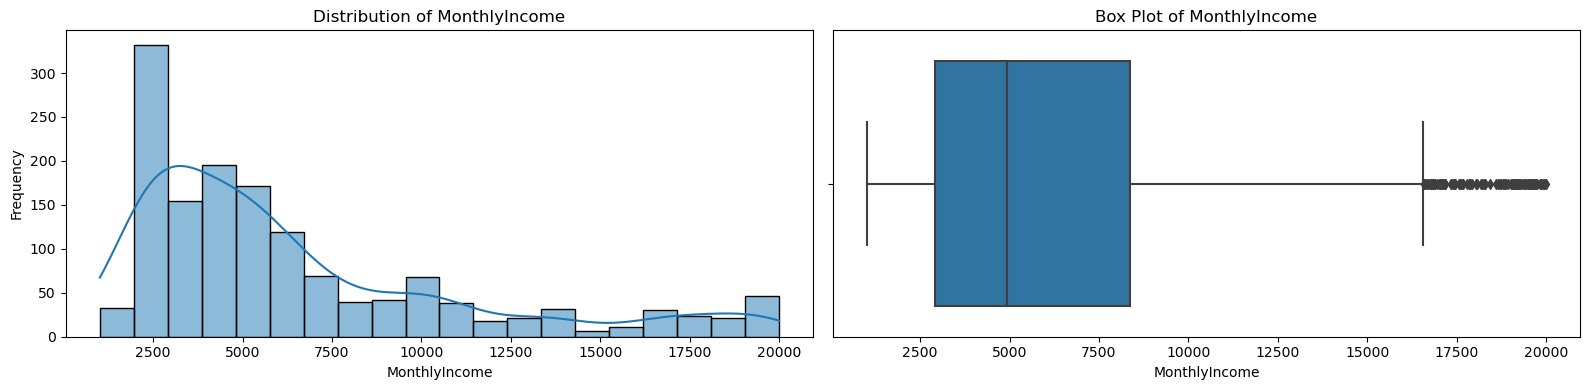

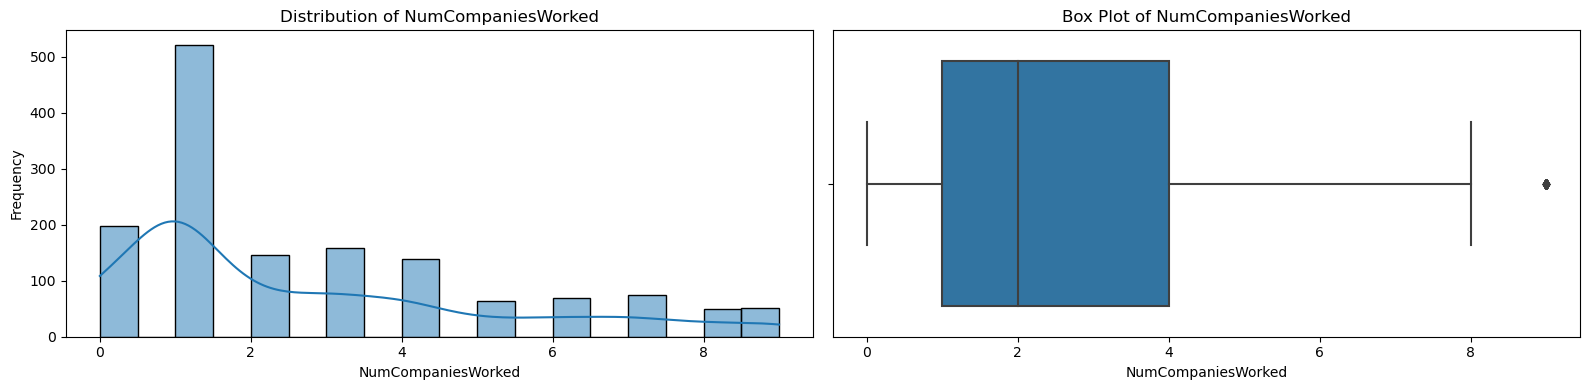

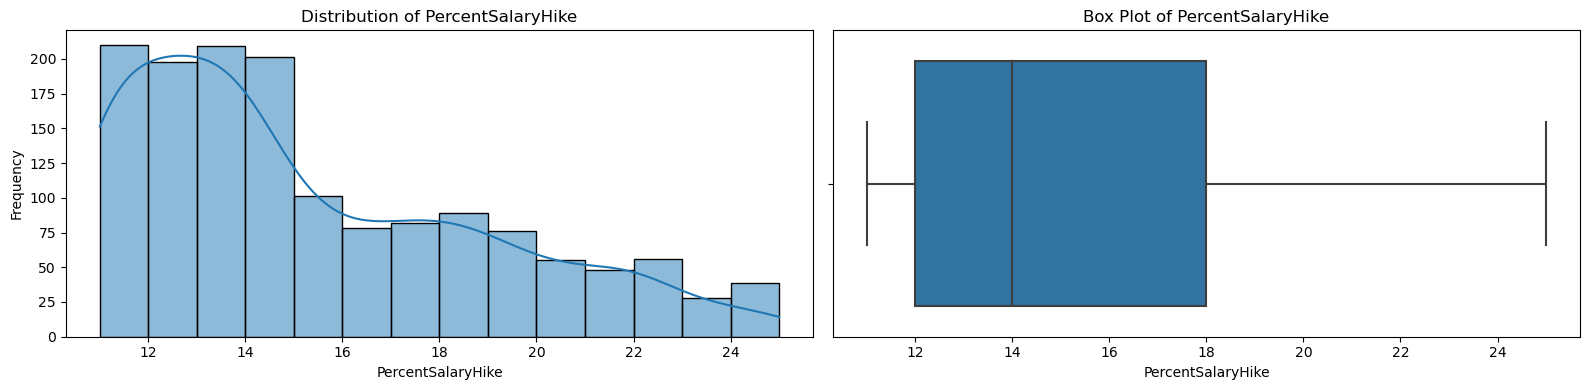

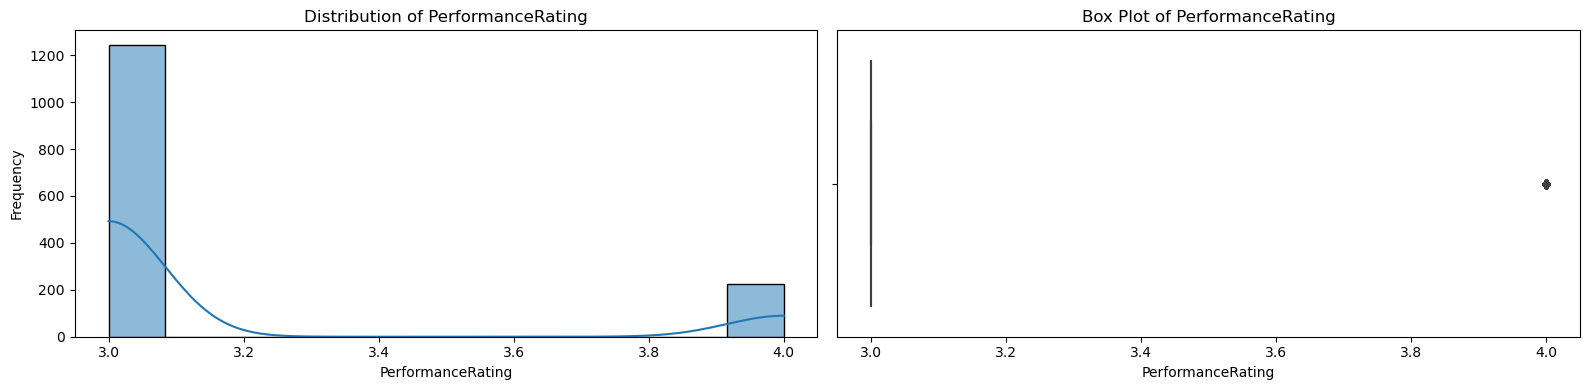

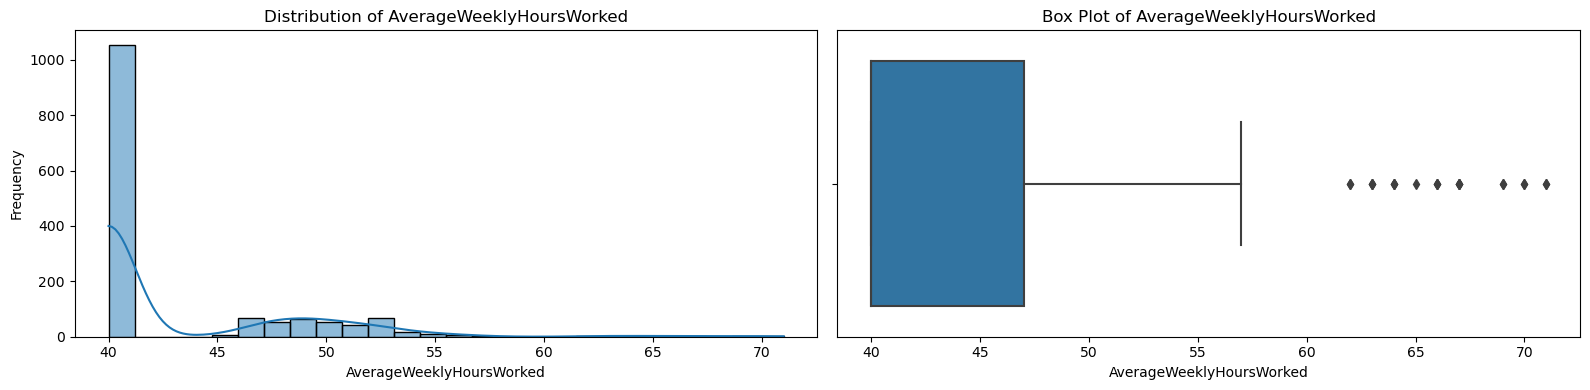

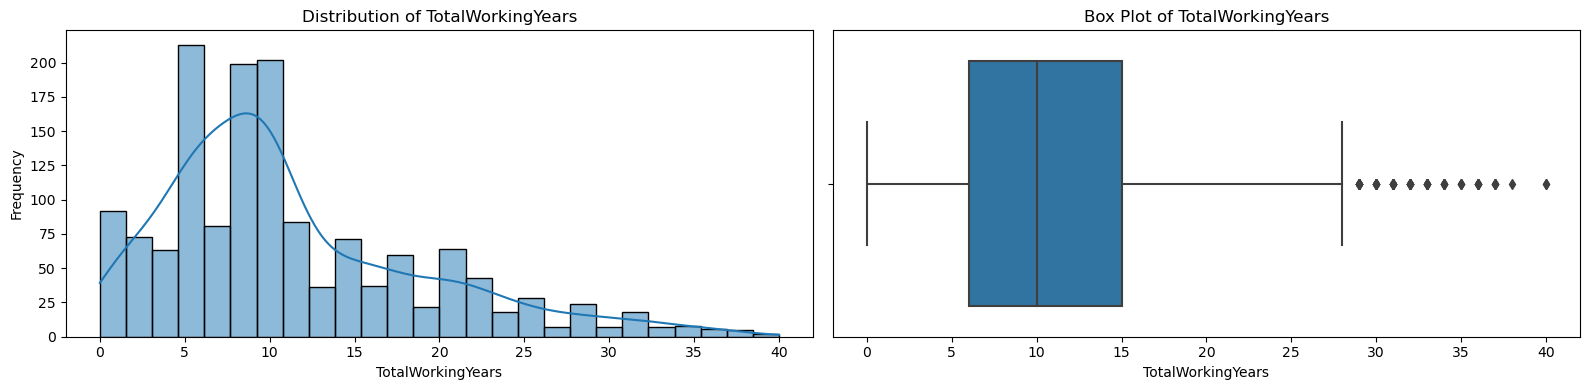

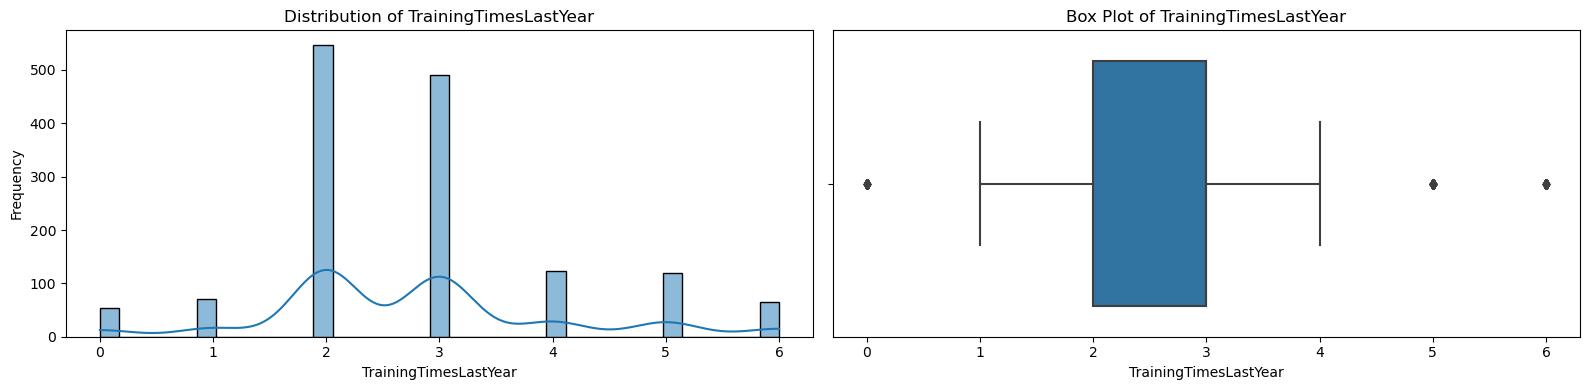

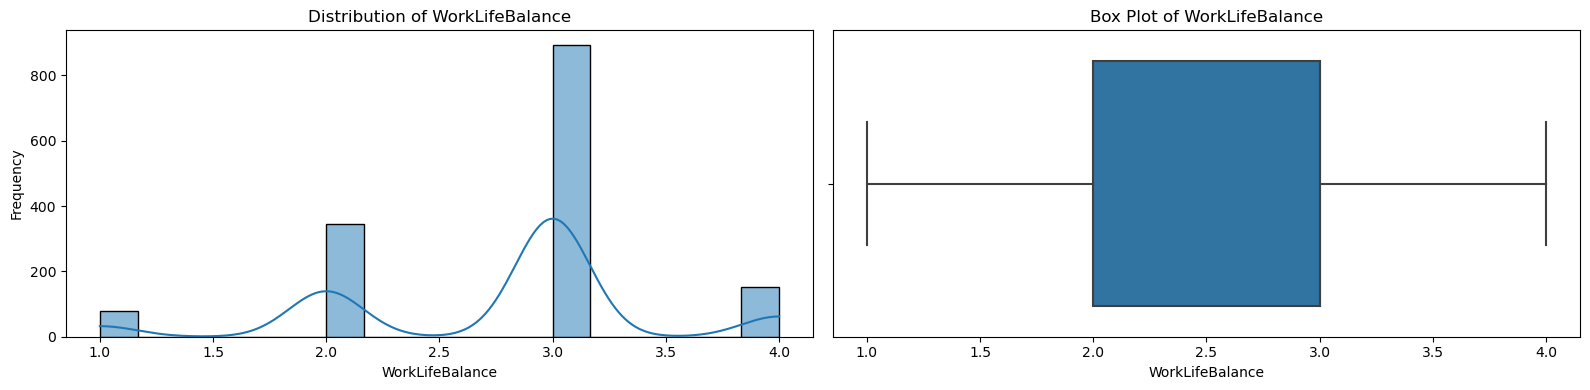

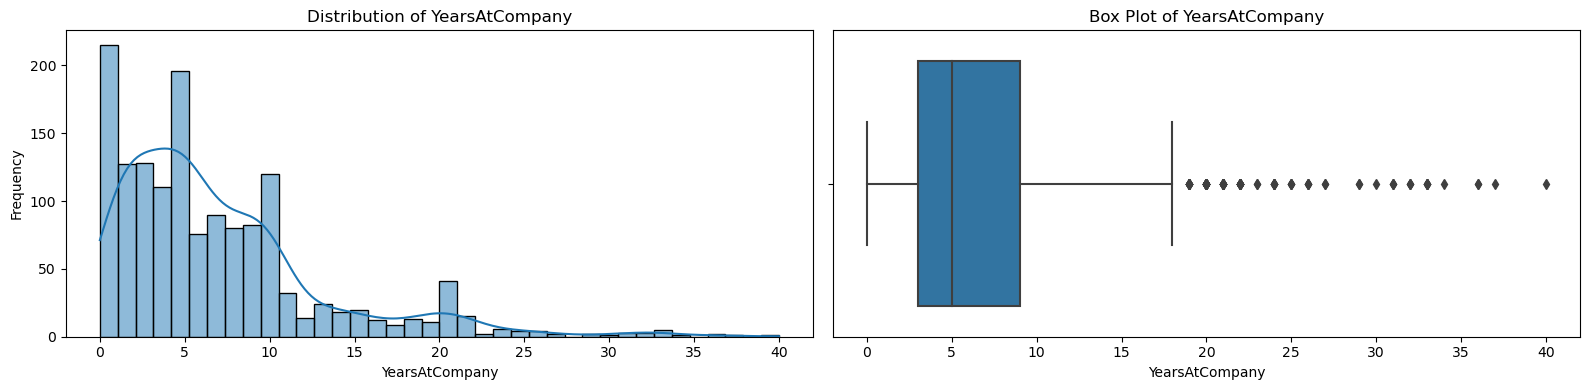

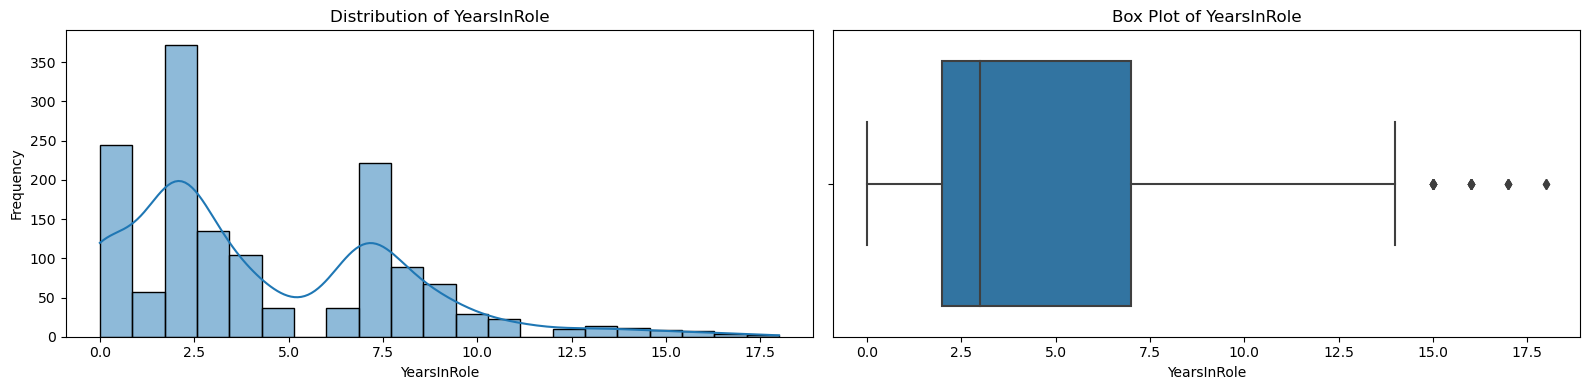

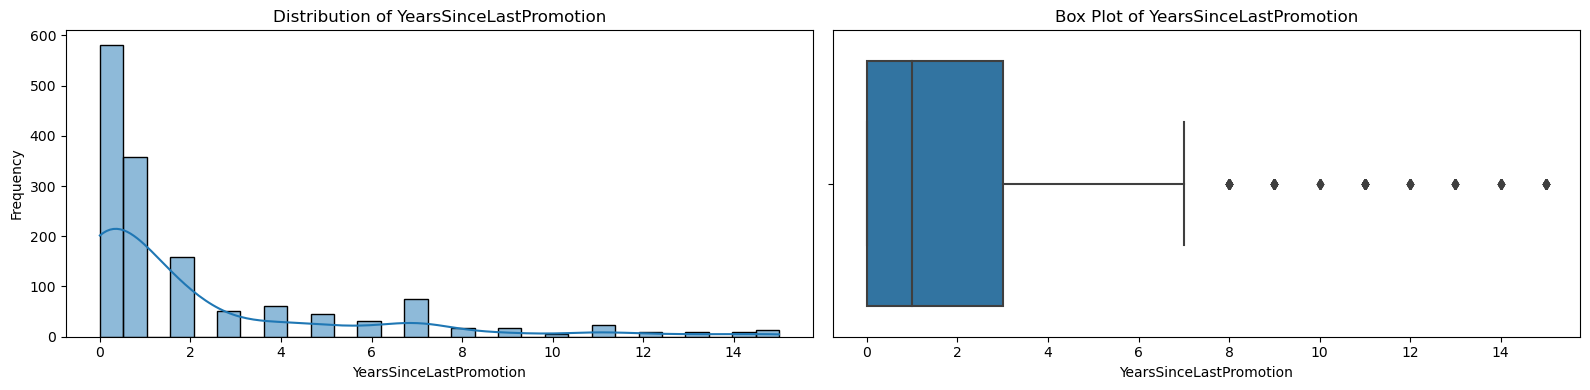

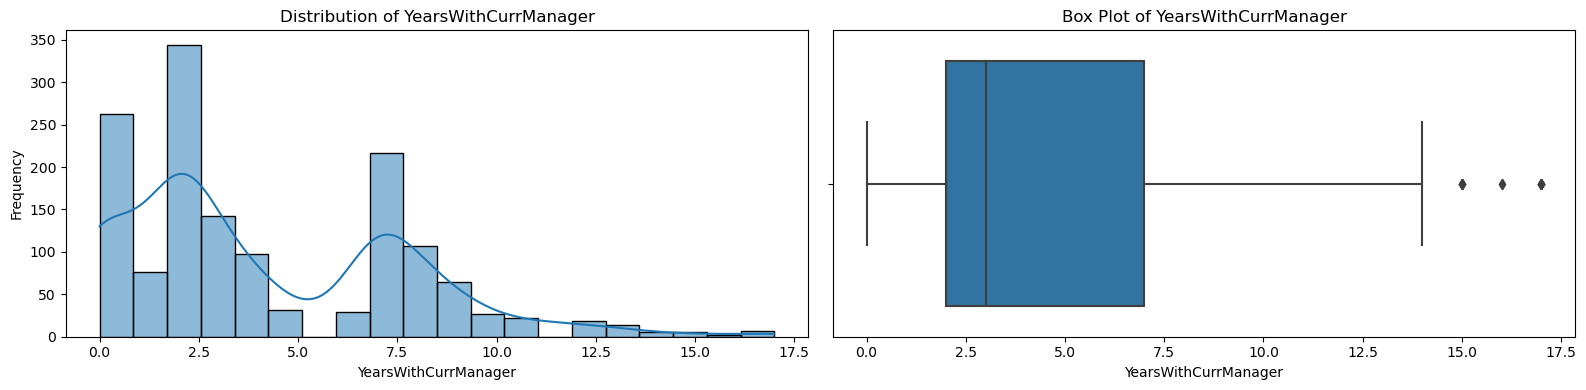

In [4]:
for col in numerical_columns:
    # Create a figure for each variable with 2 subplots (side by side)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    
    # Histogram on the left
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    
    # Box plot on the right
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

In [5]:
# Descriptive statistics for categorical columns

# Calculating proportions for categorical attributes
categorical_columns = df.select_dtypes(include=['object']).columns
proportions = {col: df[col].value_counts(normalize=True) for col in categorical_columns}

proportions

{'Resigned': No     0.838776
 Yes    0.161224
 Name: Resigned, dtype: float64,
 'BusinessTravel': Travel_Rarely        0.709524
 Travel_Frequently    0.188435
 Non-Travel           0.102041
 Name: BusinessTravel, dtype: float64,
 'BusinessUnit': Consultants            0.653741
 Sales                  0.303401
 Business Operations    0.042857
 Name: BusinessUnit, dtype: float64,
 'Gender': Male      0.6
 Female    0.4
 Name: Gender, dtype: float64,
 'MaritalStatus': Married     0.457823
 Single      0.319728
 Divorced    0.222449
 Name: MaritalStatus, dtype: float64,
 'OverTime': No     0.717007
 Yes    0.282993
 Name: OverTime, dtype: float64}

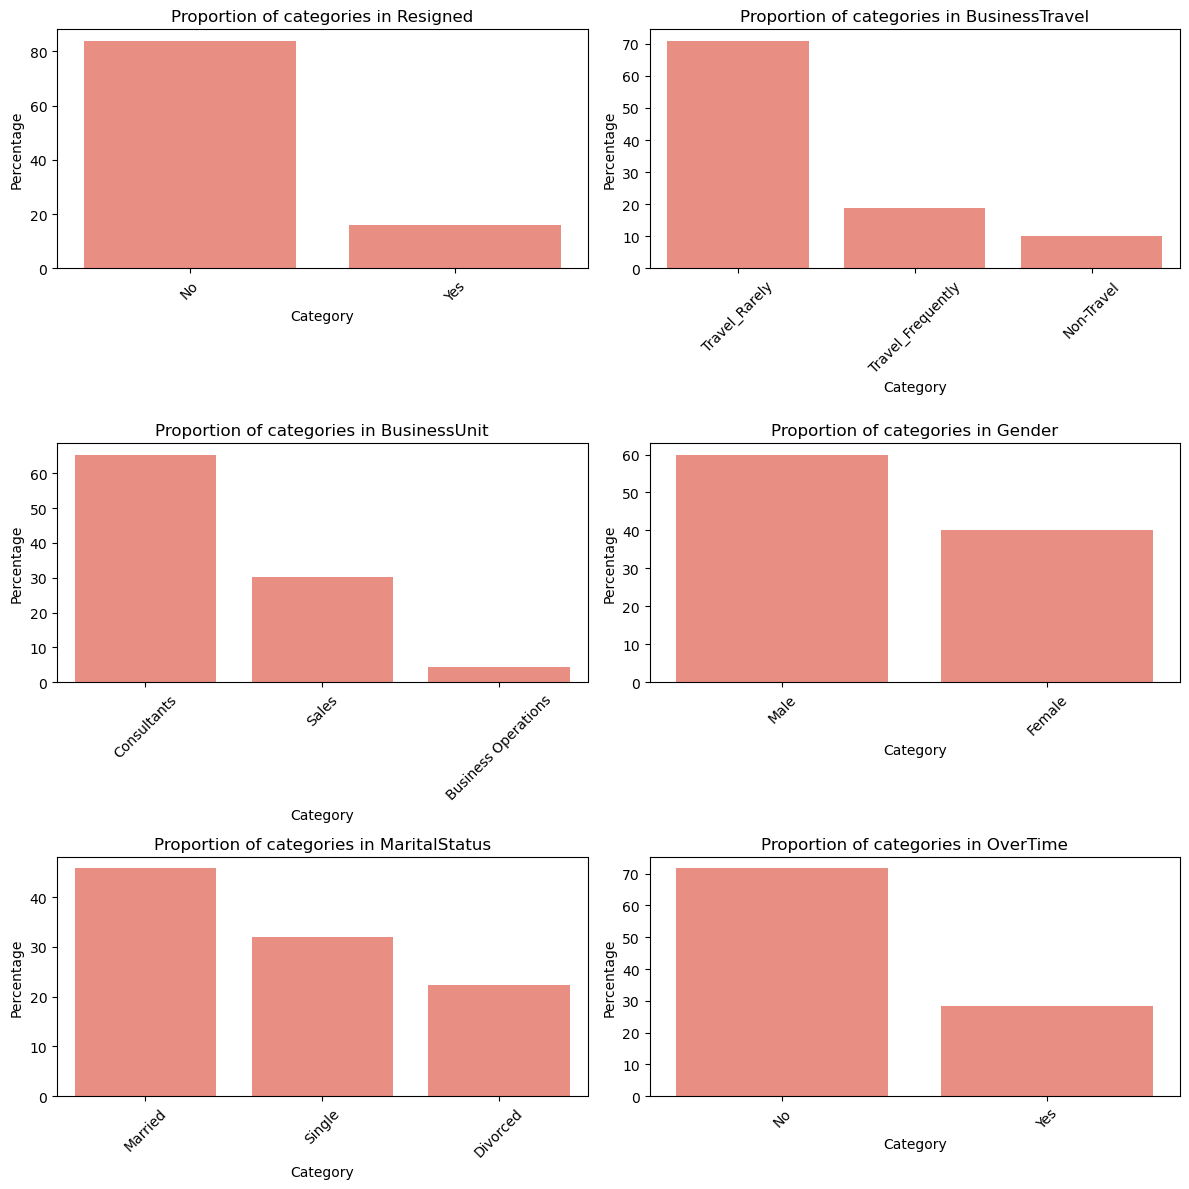

In [6]:
# Calculating the number of rows needed for the subplot grid (each row has 2 columns)
n_rows = len(categorical_columns) // 2 + (len(categorical_columns) % 2 > 0)

# Creating a figure and a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(12, 4 * n_rows)) 
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    # Normalizing value counts to get proportions
    sns.barplot(x=df[col].value_counts(normalize=True).index, 
                y=df[col].value_counts(normalize=True).values * 100, 
                ax=axes[i], color='salmon')
    axes[i].set_title(f'Proportion of categories in {col}')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel('Category')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Inferential statistics

##### T-test for numeric variables

In [7]:
# Initializing an empty dictionary to store t-test results
t_test_results = {}

# Performing t-tests for all numerical variables between resigned and not resigned groups
for col in numerical_columns:
    group1 = df[df['Resigned'] == 'Yes'][col]
    group2 = df[df['Resigned'] == 'No'][col]
    
    t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')
    t_test_results[col] = {'t_stat': t_stat, 'p_val': p_val}

# Displaying the t-test results
t_test_results

{'Age': {'t_stat': -6.178663835307217, 'p_val': 8.356308021103587e-10},
 'EducationLevel': {'t_stat': -1.2026255155085892,
  'p_val': 0.22931520332230415},
 'JobSatisfaction': {'t_stat': -3.9862267630568273,
  'p_val': 7.04306674173115e-05},
 'MonthlyIncome': {'t_stat': -6.203935765608938,
  'p_val': 7.14736398535381e-10},
 'NumCompaniesWorked': {'t_stat': 1.6680187953544354,
  'p_val': 0.0955252620565195},
 'PercentSalaryHike': {'t_stat': -0.5164573250747643,
  'p_val': 0.6056128238893757},
 'PerformanceRating': {'t_stat': 0.11068150493295092,
  'p_val': 0.9118840421069003},
 'AverageWeeklyHoursWorked': {'t_stat': 12.878687897986072,
  'p_val': 4.8952700190680316e-36},
 'TotalWorkingYears': {'t_stat': -6.6522546135024445,
  'p_val': 4.0618781112668525e-11},
 'TrainingTimesLastYear': {'t_stat': -2.28290299236669,
  'p_val': 0.022578499737201205},
 'WorkLifeBalance': {'t_stat': -2.4548148934297767,
  'p_val': 0.014211054989021308},
 'YearsAtCompany': {'t_stat': -5.1963086670254235,
  'p

##### Chi-square test for categorical variables

In [8]:
# Creating an empty dictionary for Chi-square test results
chi_square_results = {}

for col in categorical_columns:
    # Creating a cross-tabulation table
    contingency_table = pd.crosstab(df[col], df['Resigned'])
    
    # Performing the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Storing the results
    chi_square_results[col] = {'chi2_statistic': chi2, 'p_value': p}

# Displaying the Chi-square test results
for col, results in chi_square_results.items():
    print(f"{col}: Chi2 Statistic = {results['chi2_statistic']:.3f}, P-value = {results['p_value']:.3f}")

Resigned: Chi2 Statistic = 1462.615, P-value = 0.000
BusinessTravel: Chi2 Statistic = 24.182, P-value = 0.000
BusinessUnit: Chi2 Statistic = 10.796, P-value = 0.005
Gender: Chi2 Statistic = 1.117, P-value = 0.291
MaritalStatus: Chi2 Statistic = 46.164, P-value = 0.000
OverTime: Chi2 Statistic = 87.564, P-value = 0.000


### Exploring Relationships

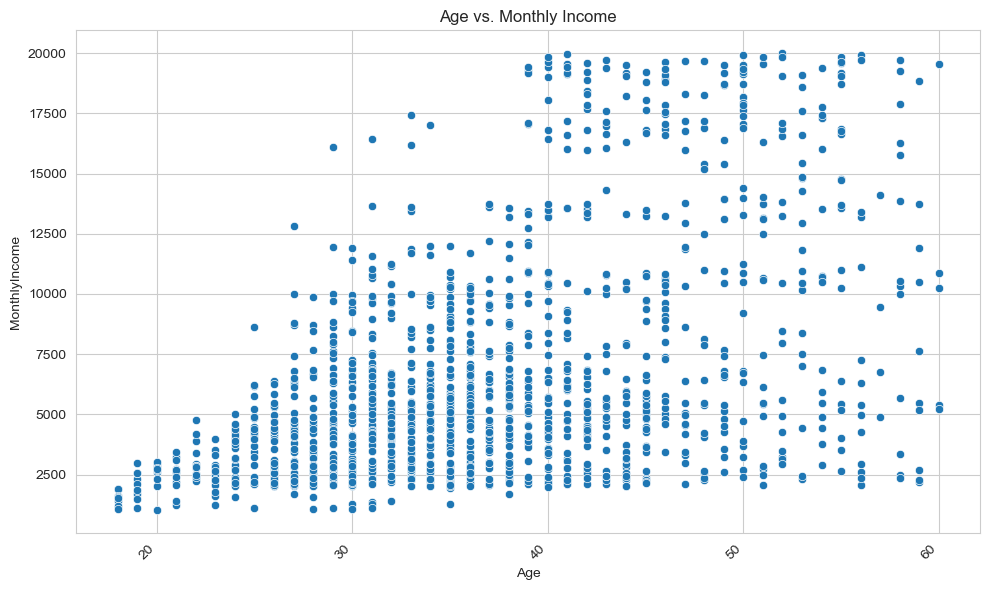

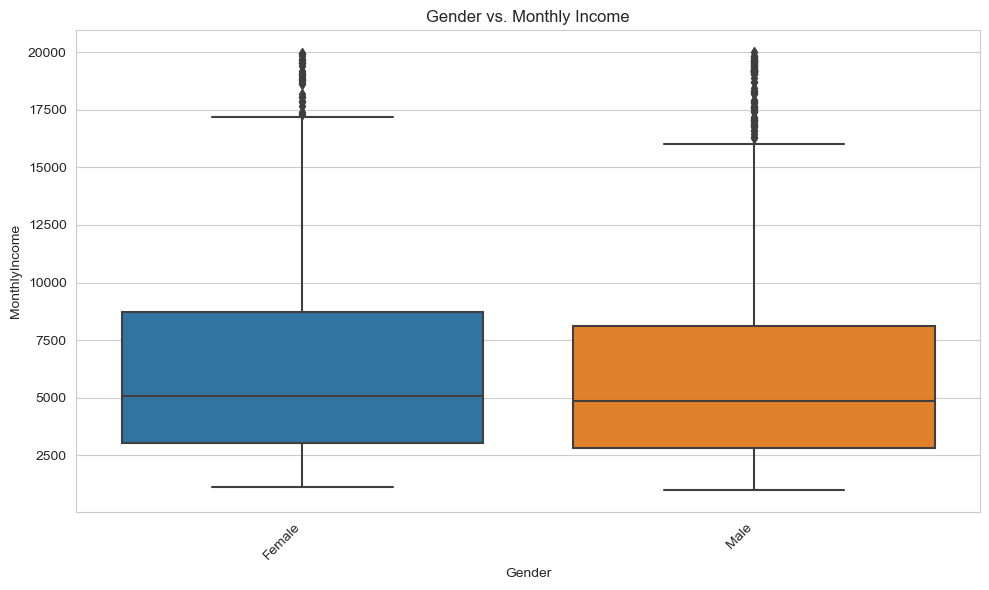

In [9]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Defining a function to create plots for the selected pairs
def create_plot(data, x, y, hue=None, kind='scatter', title=''):
    plt.figure(figsize=(10, 6))
    if kind == 'scatter':
        sns.scatterplot(data=data, x=x, y=y, hue=hue)
    elif kind == 'box':
        sns.boxplot(data=data, x=x, y=y, hue=hue)
    elif kind == 'bar':
        sns.barplot(data=data, x=x, y=y, hue=hue)
    elif kind == 'point':
        sns.pointplot(data=data, x=x, y=y, hue=hue)
    
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

# 1. Age and MonthlyIncome
create_plot(df, 'Age', 'MonthlyIncome', title='Age vs. Monthly Income')

# 2. Gender and MonthlyIncome
create_plot(df, 'Gender', 'MonthlyIncome', kind='box', title='Gender vs. Monthly Income')

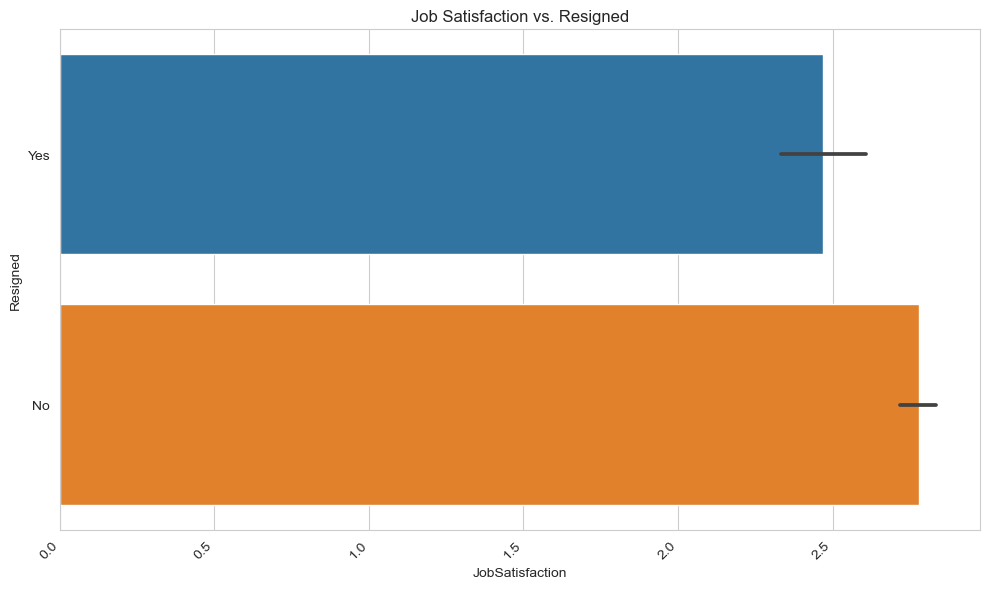

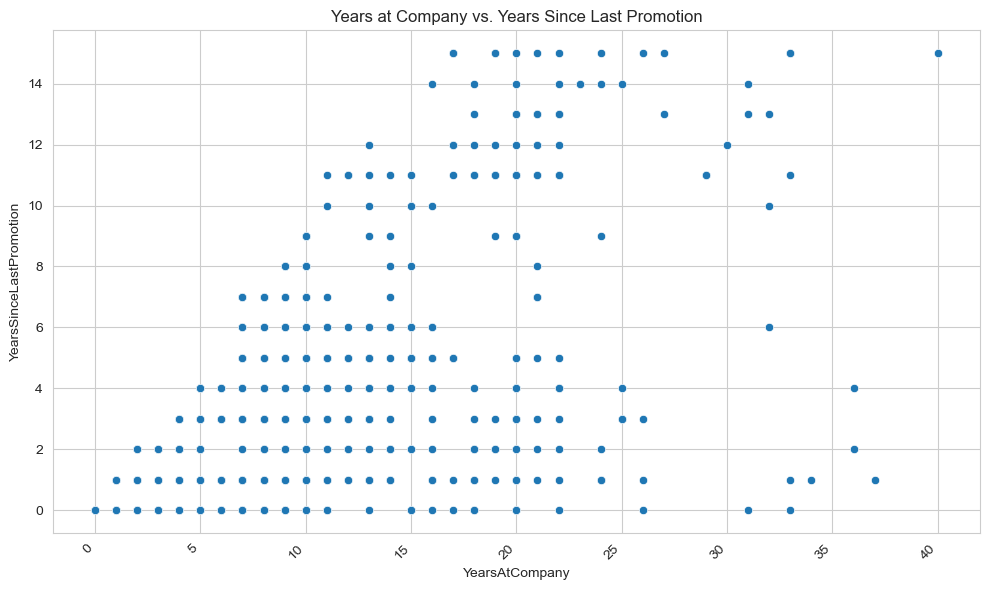

In [10]:
# 3. JobSatisfaction and Resigned
create_plot(df, 'JobSatisfaction', 'Resigned', kind='bar', title='Job Satisfaction vs. Resigned')

# 4. YearsAtCompany and YearsSinceLastPromotion
create_plot(df, 'YearsAtCompany', 'YearsSinceLastPromotion', kind='scatter', title='Years at Company vs. Years Since Last Promotion')

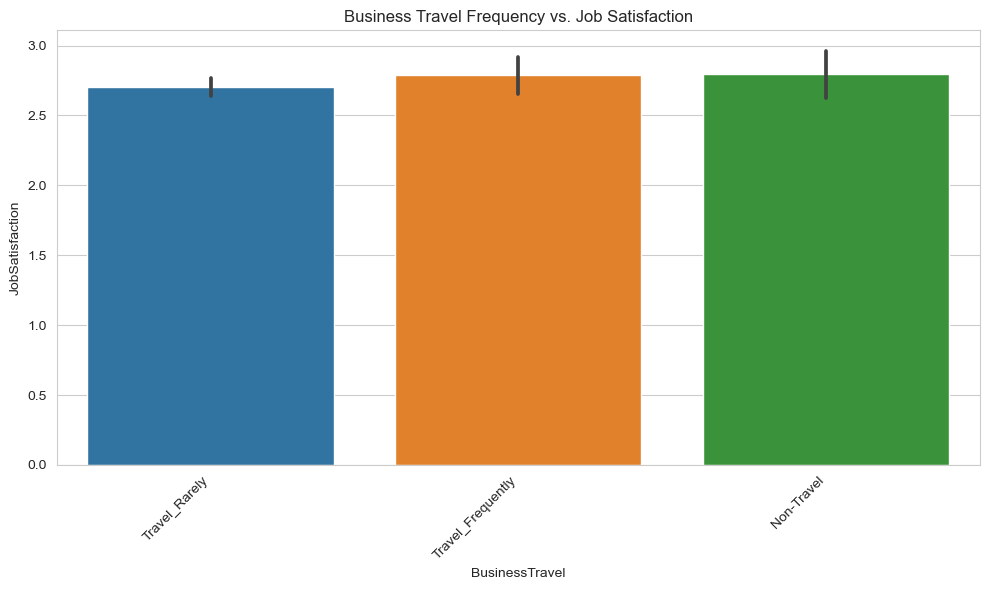

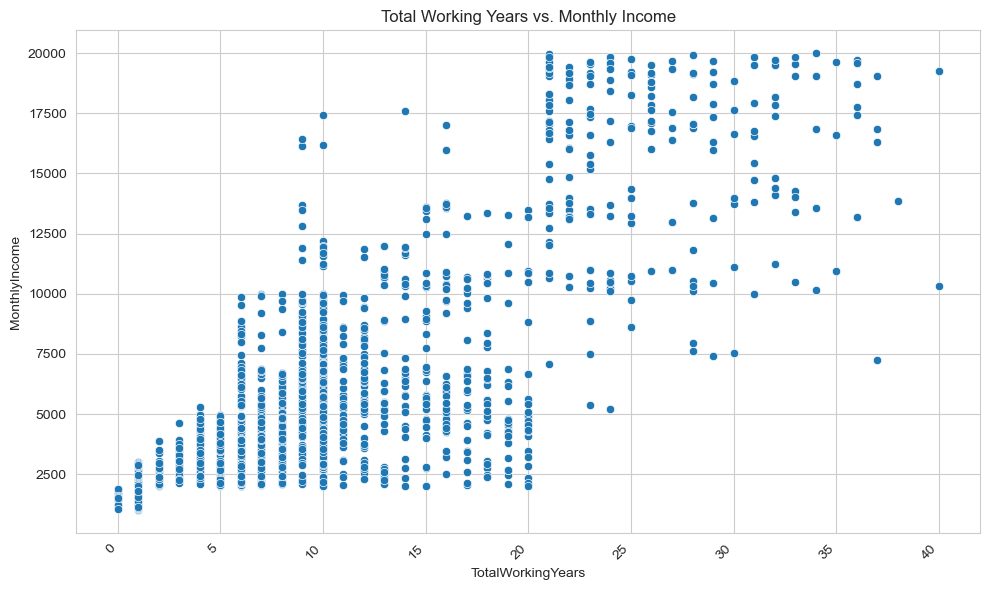

In [11]:
# 5. BusinessTravel and JobSatisfaction
create_plot(df, 'BusinessTravel', 'JobSatisfaction', kind='bar', title='Business Travel Frequency vs. Job Satisfaction')

# 6. TotalWorkingYears and MonthlyIncome
create_plot(df, 'TotalWorkingYears', 'MonthlyIncome', title='Total Working Years vs. Monthly Income')

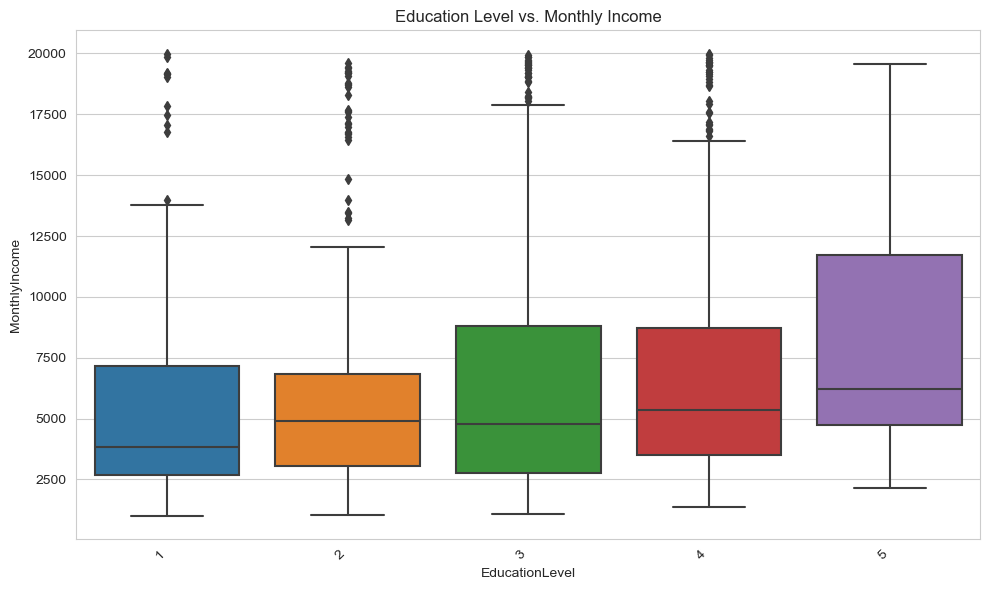

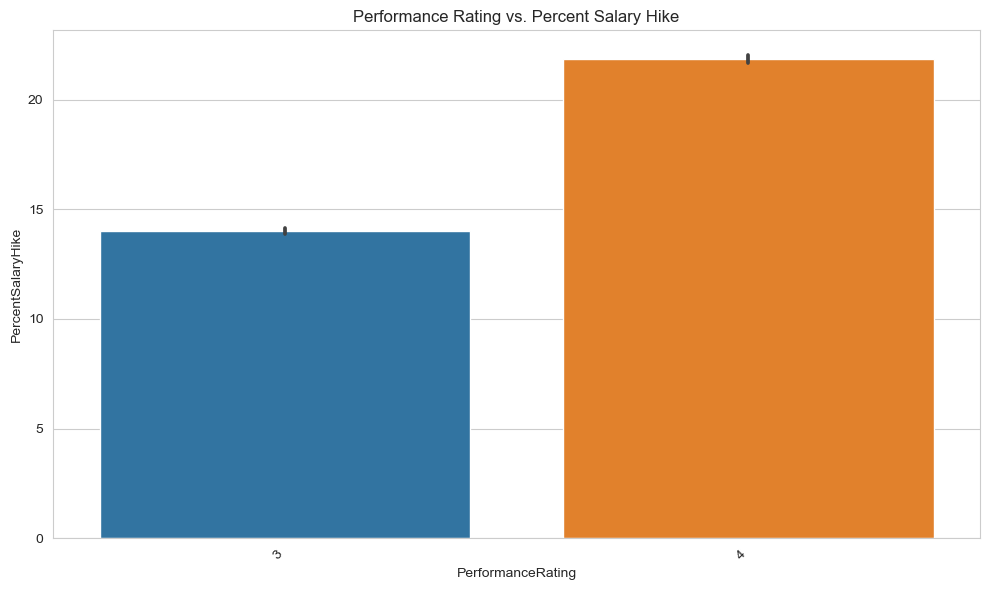

In [12]:
# 7. EducationLevel and MonthlyIncome
create_plot(df, 'EducationLevel', 'MonthlyIncome', kind='box', title='Education Level vs. Monthly Income')

# 8. PerformanceRating and PercentSalaryHike
create_plot(df, 'PerformanceRating', 'PercentSalaryHike', kind='bar', title='Performance Rating vs. Percent Salary Hike')

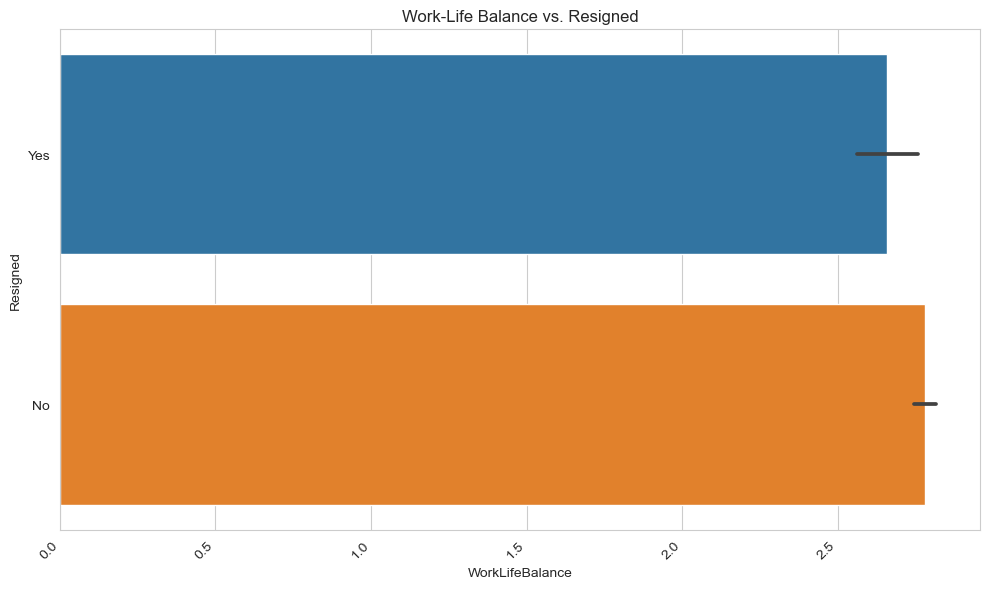

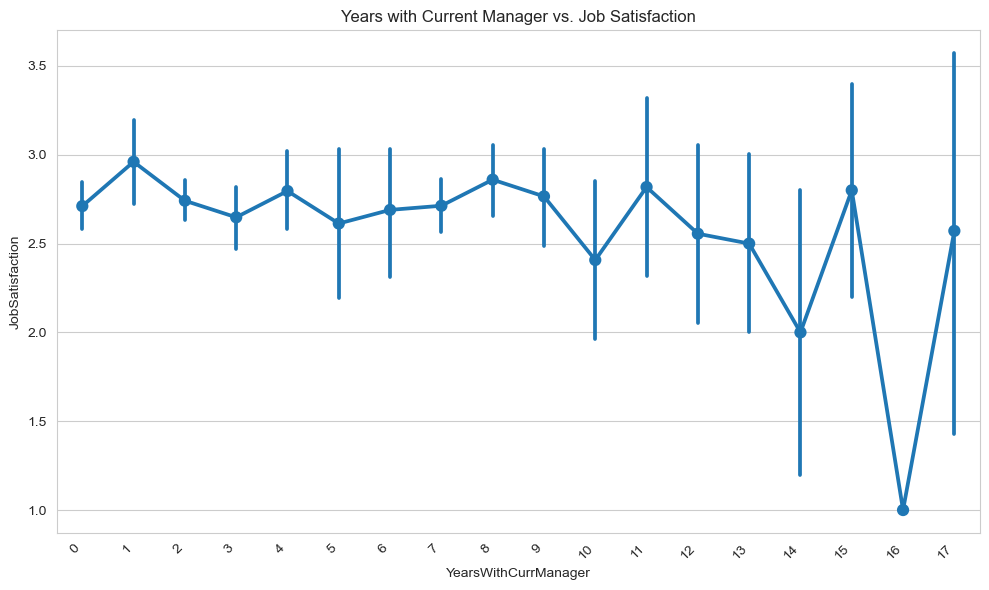

In [13]:
# 9. WorkLifeBalance and Resigned
create_plot(df, 'WorkLifeBalance', 'Resigned', kind='bar', title='Work-Life Balance vs. Resigned')

# 10. YearsWithCurrManager and JobSatisfaction
create_plot(df, 'YearsWithCurrManager', 'JobSatisfaction', kind='point', title='Years with Current Manager vs. Job Satisfaction')


### Data Modelling

#### K-Means Clustering

/Users/aliiagismatullina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aliiagismatullina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aliiagismatullina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aliiagismatullina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

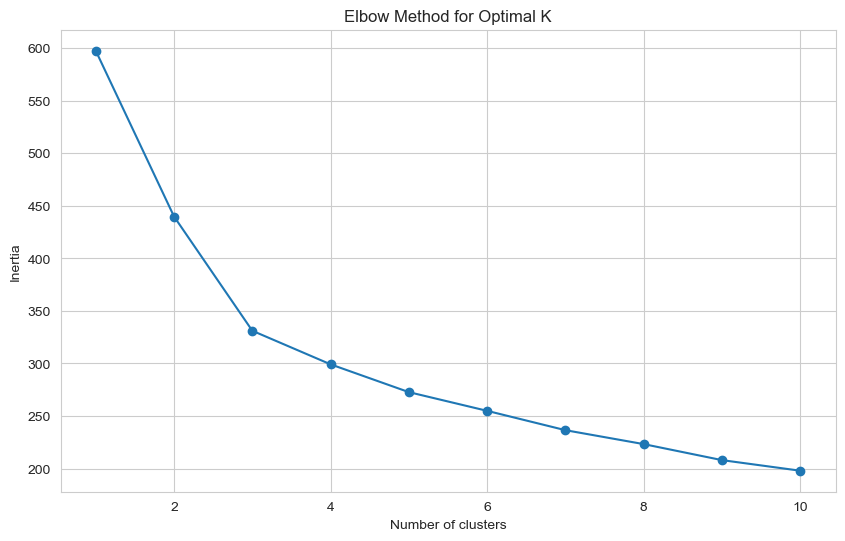

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Selecting relevant features for clustering
clustering_features = df[['MonthlyIncome', 'Age', 'YearsAtCompany', 'YearsSinceLastPromotion',
                               'JobSatisfaction', 'WorkLifeBalance', 'TotalWorkingYears']]

# Normalizing the data
scaler = MinMaxScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocessing the data: we'll encode categorical variables and scale the numerical ones
# For the purposes of clustering, we'll drop the 'EmployeeID' column as it's a unique identifier and not useful for clustering
df_processed = df.drop('EmployeeID', axis=1)
df_processed = pd.get_dummies(df_processed)  # Converting categorical variables to dummy variables

# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_processed)

# Applying KMeans clustering
# The elbow method in the image suggests around 4 or 5 clusters could be optimal.
# We'll choose 5 for a clearer differentiation between clusters.
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

# Adding the cluster labels to the original data for interpretability
df['Cluster'] = kmeans.labels_

# Now we'll take a look at the mean values of some key columns by cluster to start our analysis
cluster_summary = df.groupby('Cluster').mean()
cluster_summary


/Users/aliiagismatullina/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/q_/pm596j5x7tlc894qn_ks98y80000gn/T/ipykernel_12830/3029949803.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('Cluster').mean()


,EmployeeID,Age,EducationLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
Cluster,,,,,,,,,,,,,,,,
0,5600.255906,44.000000,3.106299,2.681102,12285.555118,2.858268,14.885827,3.149606,41.385827,22.000000,2.775591,2.811024,16.397638,8.877953,6.224409,8.555118
1,5289.790909,32.600000,2.809091,2.440909,4242.754545,2.886364,15.250000,3.168182,47.259091,6.977273,2.659091,2.668182,3.959091,2.431818,1.404545,2.427273
2,5775.564706,38.141176,2.917647,2.882353,6450.203922,2.462745,15.058824,3.137255,49.894118,11.286275,2.705882,2.733333,6.090196,3.870588,1.556863,3.690196
3,5417.211876,35.363023,2.875843,2.777328,5209.946019,2.658570,15.360324,3.156545,40.000000,8.879892,2.881242,2.781377,5.010796,3.292848,1.253711,3.256410


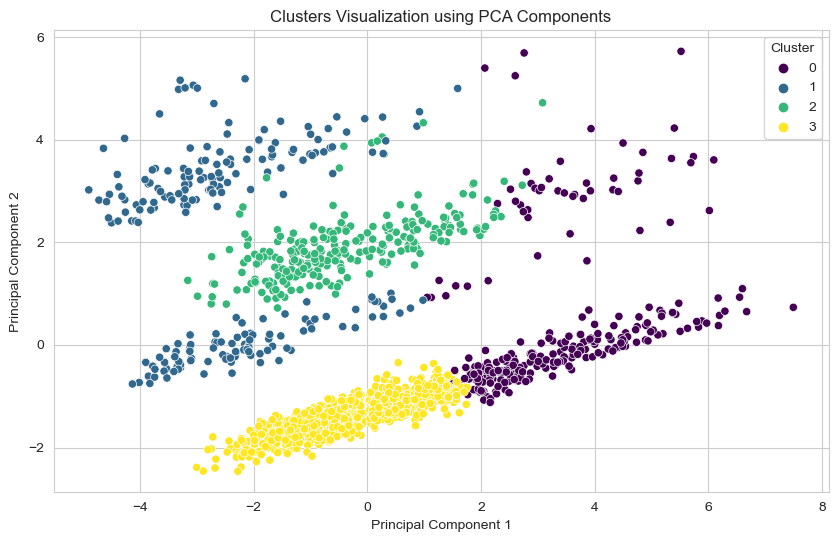

In [16]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for 2D visualization
df_pca = pca.fit_transform(df_scaled)

# Creating a DataFrame for the PCA results
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans.labels_  # Adding the cluster labels from KMeans

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_pca, hue='Cluster', palette='viridis', legend='full')
plt.title('Clusters Visualization using PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

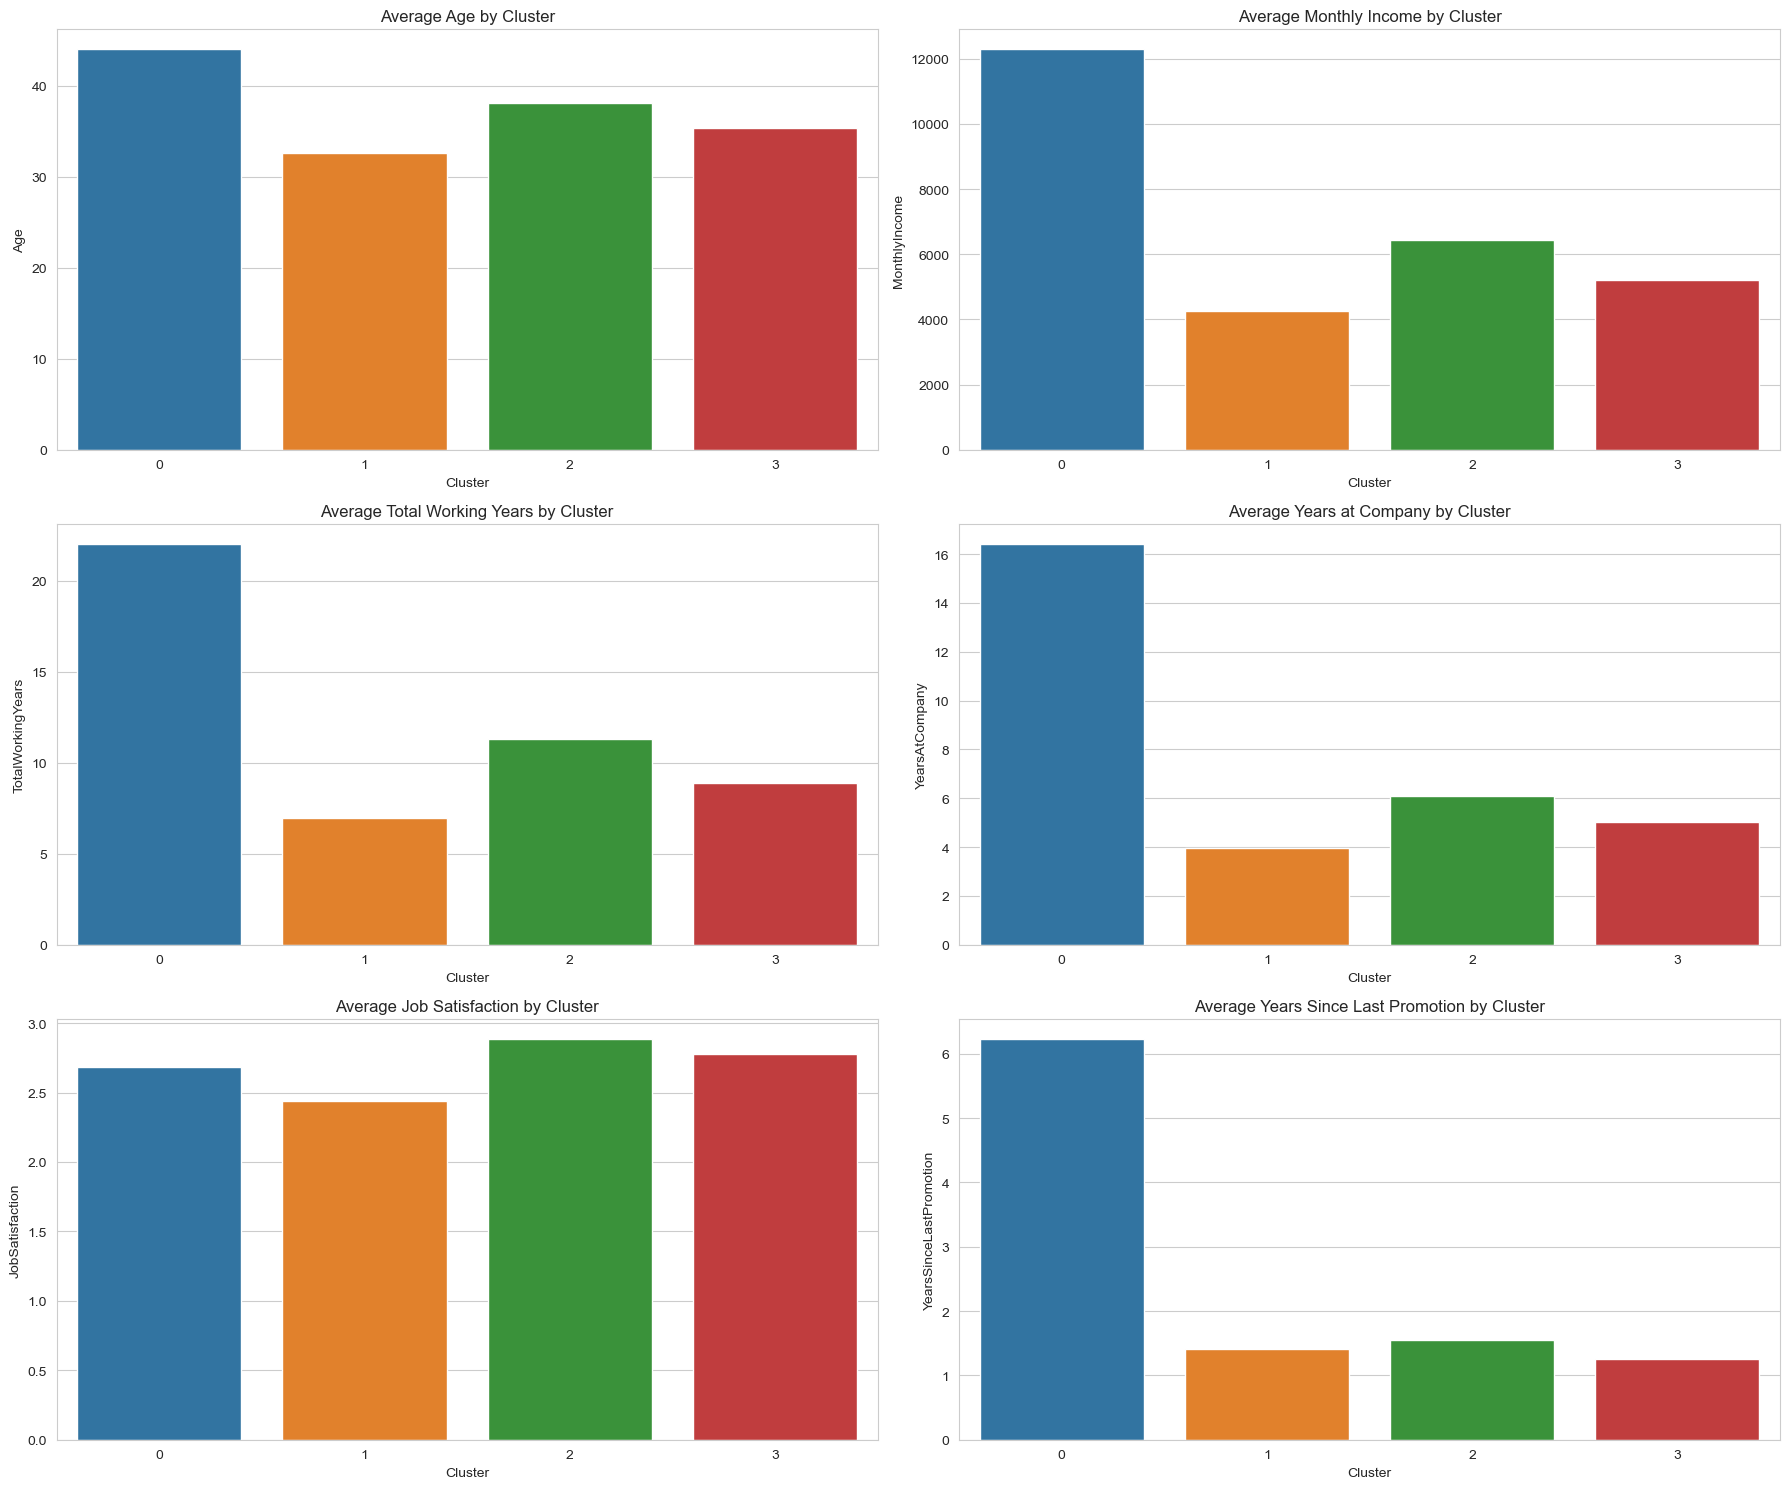

In [17]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure and a set of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Unpacking all the axes
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

# Plotting each attribute as a separate bar chart
sns.barplot(x=cluster_summary.index, y='Age', data=cluster_summary, ax=ax1)
sns.barplot(x=cluster_summary.index, y='MonthlyIncome', data=cluster_summary, ax=ax2)
sns.barplot(x=cluster_summary.index, y='TotalWorkingYears', data=cluster_summary, ax=ax3)
sns.barplot(x=cluster_summary.index, y='YearsAtCompany', data=cluster_summary, ax=ax4)
sns.barplot(x=cluster_summary.index, y='JobSatisfaction', data=cluster_summary, ax=ax5)
sns.barplot(x=cluster_summary.index, y='YearsSinceLastPromotion', data=cluster_summary, ax=ax6)

# Setting titles for each subplot
ax1.set_title('Average Age by Cluster')
ax2.set_title('Average Monthly Income by Cluster')
ax3.set_title('Average Total Working Years by Cluster')
ax4.set_title('Average Years at Company by Cluster')
ax5.set_title('Average Job Satisfaction by Cluster')
ax6.set_title('Average Years Since Last Promotion by Cluster')

plt.tight_layout()
plt.show()

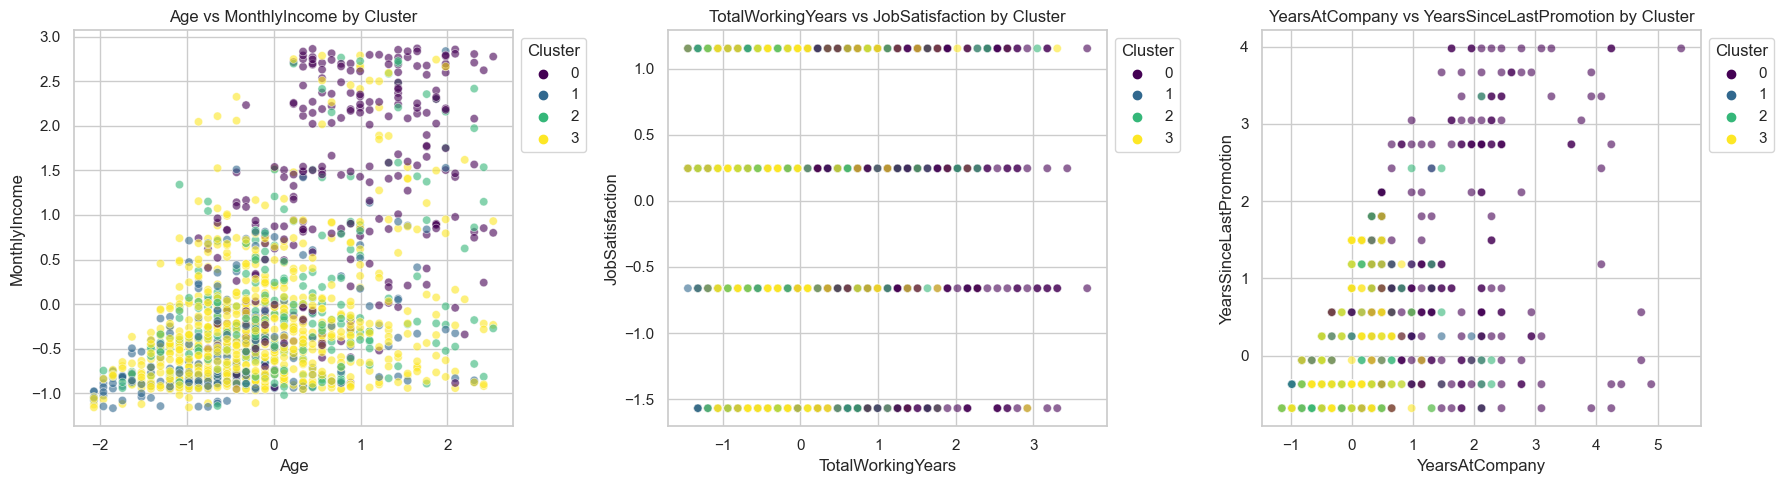

In [18]:
# We will use the scaled data (df_scaled) and the cluster labels to create a DataFrame for visualization
df_visualization = pd.DataFrame(df_scaled, columns=df_processed.columns)
df_visualization['Cluster'] = kmeans.labels_

# Feature pairs for visualization
feature_pairs = [
    ('Age', 'MonthlyIncome'),
    ('TotalWorkingYears', 'JobSatisfaction'),
    ('YearsAtCompany', 'YearsSinceLastPromotion')
]

# Plot configurations
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# Generate scatter plots for each feature pair
for i, (x, y) in enumerate(feature_pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df_visualization, x=x, y=y, hue='Cluster', palette='viridis', alpha=0.6)
    plt.title(f'{x} vs {y} by Cluster')
    plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()